In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.preprocessing import (create_eog_epochs, create_ecg_epochs,
                               compute_proj_ecg, compute_proj_eog)
import scipy.io

plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
raw = mne.io.read_raw_eeglab('../data/1122/fixica.set')
# raw = mne.io.read_epochs_eeglab('../data/online_test.set')

Reading /Users/mpin/Documents/MDS/capstone/simpl_eeg_capstone/data/1122/fixica.fdt


<ipython-input-3-0ddfdf178fd3>:1: RuntimeWarning: Data file name in EEG.data (1122 fix ica.fdt) is incorrect, the file name must have changed on disk, using the correct file name (fixica.fdt).
  raw = mne.io.read_raw_eeglab('../data/1122/fixica.set')


In [4]:
raw

<RawEEGLAB | fixica.fdt, 19 x 12026819 (5872.5 s), ~30 kB, data not loaded>

In [5]:
raw_df = raw.to_data_frame()

In [24]:
raw_df.tail()

,time,Fp1,Fp2,F7,T3,T5,F3,C3,P3,Fz,Cz,Pz,F4,C4,P4,F8,T4,T6,O1,O2
12026814,5872468,0.431599,-11.203208,-5.401009,-8.842719,-21.067455,-5.125039,-13.202153,-17.706484,-3.385837,-4.494127,-10.534277,10.303233,-0.655697,-3.229792,0.609808,2.967641,4.266589,-12.140933,-21.257788
12026815,5872468,-1.489737,-10.815990,-6.092179,-8.904007,-18.108355,-7.078905,-13.184569,-16.075550,-6.267701,-8.176545,-11.692679,5.932804,-3.483309,-6.786361,-0.193163,1.509319,2.484582,-18.077801,-24.505026
12026816,5872469,-1.968966,-9.105274,-6.192163,-9.354151,-19.288197,-6.856446,-12.696264,-17.376734,-5.699758,-8.334212,-12.509238,4.847283,-4.542382,-8.081605,0.227286,-0.522487,-3.278140,-19.413612,-23.679283
12026817,5872469,-2.041348,-3.647175,-3.493313,-5.040982,-10.048667,-3.964209,-5.937623,-10.364542,-3.652566,-7.439807,-11.316919,0.339351,-3.996915,-8.074924,0.826789,-1.911655,-6.392892,-16.061987,-16.736626
12026818,5872470,-5.145539,-2.866096,-6.124642,-8.707499,-14.008355,-9.241770,-12.758223,-14.021847,-8.529985,-10.485762,-12.556963,-5.737384,-9.181812,-11.634192,-1.243321,-6.798472,-14.975504,-18.003803,-18.473955


In [7]:
type(raw)

mne.io.eeglab.eeglab.RawEEGLAB

Effective window size : 1.000 (s)


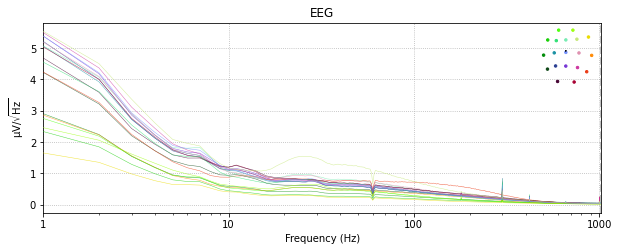

Effective window size : 1.000 (s)


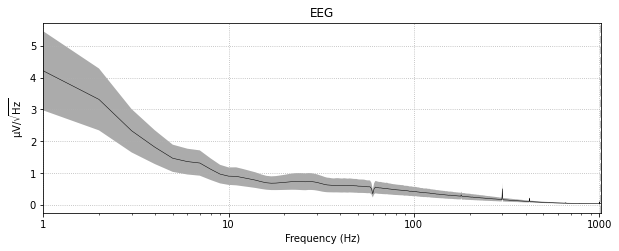

In [8]:
for average in (False, True):
    raw.plot_psd(average=average, dB=False, xscale='log')

Adding average EEG reference projection.
1 projection items deactivated


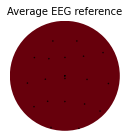

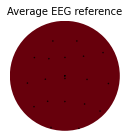

In [9]:
raw.copy().set_eeg_reference(projection=True).plot_projs_topomap() 

In [10]:
#projs, events = compute_proj_ecg(raw, n_grad=1, n_mag=1, n_eeg=1, reject=None)

In [11]:
#mne.viz.plot_projs_topomap(raw, info=raw.info)

In [12]:
raw.get_data().shape

(19, 12026819)

In [13]:
# raw.copy().pick_types(meg=False, stim=True).plot(start=3, duration=6) # Stim channel?

# mne.find_events(raw)

Effective window size : 1.000 (s)


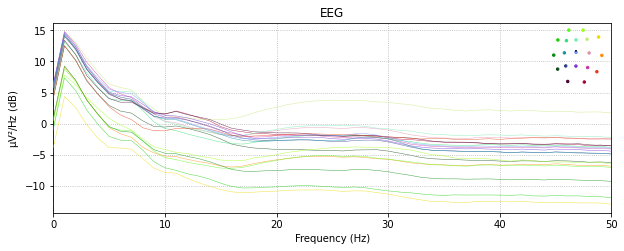

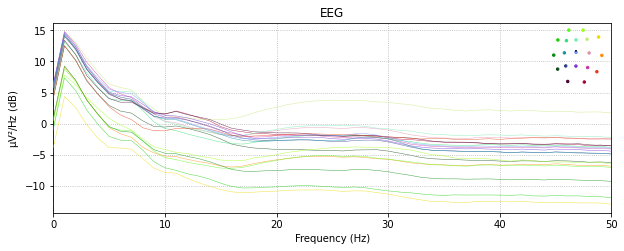

In [14]:
raw.plot_psd(fmax=50)

Fitting ICA to data using 19 channels (please be patient, this may take a while)


<ipython-input-15-5832323e7c42>:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 19 components


<ipython-input-15-5832323e7c42>:2: RuntimeWarning: Using n_components=19 (resulting in n_components_=19) may lead to an unstable mixing matrix estimation because the ratio between the largest (14) and smallest (1.3e-15) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 11
  ica.fit(raw)


Fitting ICA took 279.3s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
2936 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
2936 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


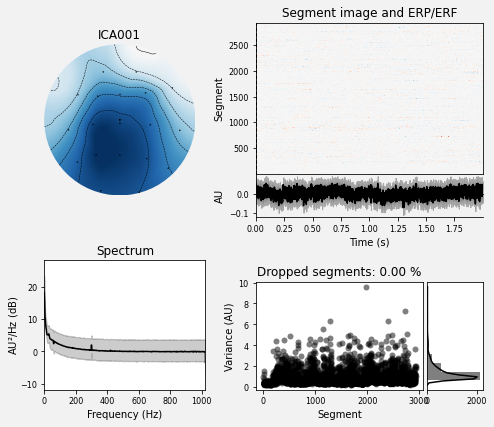

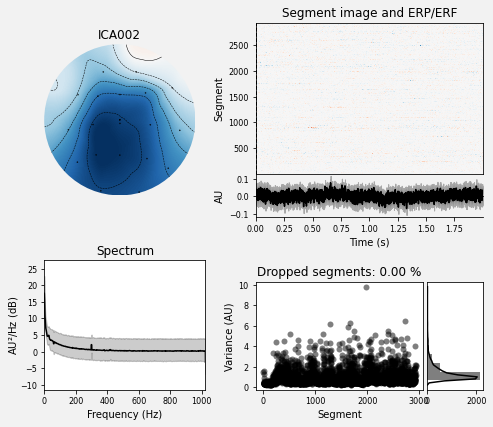

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [15]:
ica = mne.preprocessing.ICA(n_components=19, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

In [16]:
chs = raw.ch_names # get a list of channel names form here
print(len(chs))
chs

19


['Fp1',
 'Fp2',
 'F7',
 'T3',
 'T5',
 'F3',
 'C3',
 'P3',
 'Fz',
 'Cz',
 'Pz',
 'F4',
 'C4',
 'P4',
 'F8',
 'T4',
 'T6',
 'O1',
 'O2']

In [ ]:
raw_csd = mne.preprocessing.compute_current_source_density(raw)
raw.plot()
raw_csd.plot()

# orig_raw = raw.copy()
# raw.load_data()
# ica.apply(raw)

# # show some frontal channels to clearly illustrate the artifact removal
# chan_idxs = [raw.ch_names.index(ch) for ch in chs]
# orig_raw.plot(order=chan_idxs) # Specify either start=12 or duration=4
# raw.plot(order=chan_idxs) # Specify either start=12 or duration=4

In [ ]:
data.shape

In [ ]:
data

In [ ]:
biosemi_montage = mne.channels.make_standard_montage('biosemi32')
n_channels = len(biosemi_montage.ch_names)
fake_info = mne.create_info(ch_names=biosemi_montage.ch_names, sfreq=250.,
                            ch_types='eeg')

rng = np.random.RandomState(0)
data = rng.normal(size=(n_channels, 1)) * 1e-6
fake_evoked = mne.EvokedArray(data, fake_info)
fake_evoked.set_montage(biosemi_montage)

In [ ]:
# first we obtain the 3d positions of selected channels
chs = ['Oz', 'Fpz', 'T7', 'T8']
pos = np.stack([biosemi_montage.get_positions()['ch_pos'][ch] for ch in chs])

# now we calculate the radius from T7 and T8 x position
# (we could use Oz and Fpz y positions as well)
radius = np.abs(pos[[2, 3], 0]).mean()

# then we obtain the x, y, z sphere center this way:
# x: x position of the Oz channel (should be very close to 0)
# y: y position of the T8 channel (should be very close to 0 too)
# z: average z position of Oz, Fpz, T7 and T8 (their z position should be the
#    the same, so we could also use just one of these channels), it should be
#    positive and somewhere around `0.03` (3 cm)
x = pos[0, 0]
y = pos[-1, 1]
z = pos[:, -1].mean()

# lets print the values we got:
print([f'{v:0.5f}' for v in [x, y, z, radius]])

In [ ]:

# create a two-panel figure with some space for the titles at the top
fig, ax = plt.subplots(ncols=2, figsize=(8, 4), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)

# we plot the channel positions with default sphere - the mne way
fake_evoked.plot_sensors(axes=ax[0], show=False)

# in the second panel we plot the positions using the EEGLAB reference sphere
fake_evoked.plot_sensors(sphere=(x, y, z, radius), axes=ax[1], show=False)

# add titles
ax[0].set_title('MNE channel projection', fontweight='bold')
ax[1].set_title('EEGLAB channel projection', fontweight='bold')


In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)

mne.viz.plot_topomap(fake_evoked.data[:, 0], fake_evoked.info, axes=ax[0],
                     show=False)
mne.viz.plot_topomap(fake_evoked.data[:, 0], fake_evoked.info, axes=ax[1],
                     show=False, sphere=(x, y, z, radius))

# add titles
ax[0].set_title('MNE', fontweight='bold')
ax[1].set_title('EEGLAB', fontweight='bold')

In [ ]:
biosemi_montage = mne.channels.make_standard_montage('biosemi16') # NOT THE SAME AS OUR DATA
biosemi_montage.plot(show_names=False)
raw.plot_sensors();

--------------

## Tophographs from raw data through custom functions

In [109]:
raw.get_montage().get_positions()['ch_pos']

OrderedDict([('Fp1', array([-21.90840681,  63.62663337,  -5.28424423])),
             ('Fp2', array([21.90810621, 63.62576037, -5.29598896])),
             ('F7', array([-53.2317449 ,  31.98485919,  -8.63945123])),
             ('T3', array([-66.84435278, -12.99322596,  -7.43361158])),
             ('T5', array([-58.3900796 , -58.3900796 ,  -1.98927356])),
             ('F3', array([-39.98550918,  42.8792089 ,  33.85      ])),
             ('C3', array([-52.68761775,  -9.29024856,  51.84550335])),
             ('P3', array([-43.12261362, -63.93190381,  45.42468348])),
             ('Fz', array([ 0.26592806, 50.78805506, 57.60853015])),
             ('Cz', array([ 0.27739786, -7.94363529, 87.33906176])),
             ('Pz',
              array([ 8.58366287e-15, -7.00909264e+01,  7.13250449e+01])),
             ('F4', array([46.26553757, 48.41411956, 36.35949753])),
             ('C4', array([59.823882  , -9.6893546 , 56.71172322])),
             ('P4', array([ 49.47175167, -70.65298354,

In [110]:
import numpy as np
import scipy.interpolate
from scipy import signal
from matplotlib import patches
import matplotlib.pyplot as plt

def get_psds(data, fs=128, f_range=[0.5, 30]):
    '''
    Calculate signal power using Welch method.

    Input: data- mxn matrix (m: number of channels, n: samples of signals)
           fs- Sampling frequency (default 128Hz)
           f_range- Frequency range (default 0.5Hz to 30Hz)
    Output: Power values and PSD values
    '''
    powers = []
    psds = list()
    for sig in data:
        freq, psd = signal.welch(sig, fs)
        idx = np.logical_and(freq >= f_range[0], freq <= f_range[1])
        powers = np.append(powers, sum(psd[idx]))
        psds.append(psd[idx])
    
    return powers, psds

def plot_topomap(data, ax, fig, draw_cbar=True):
    '''
    Plot topographic plot of EEG data. This specialy design for Emotiv 14 electrode data. 
    This can be change for any other arrangement by changing ch_pos (channel position array)
    Input: data- 1D array 14 data values
           ax- Matplotlib subplot object to be plotted every thing
           fig- Matplot lib figure object to draw colormap
           draw_cbar- Visualize color bar in the plot
    '''
    N = 300            
    xy_center = [2,2]  
    radius = 2 

    # AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
    ch_pos = [[1,4],[0.1,3], [1.5,3.5], [0.5,2.5], 
             [-0.1,2], [0.4,0.4], [1.5,0], [2.5,0], 
             [3.6,0.4], [4.1,2], [3.5,2.5], [2.5,3.5], 
             [3.9,3], [3,4]]
    x,y = [],[]
    for i in ch_pos:
        x.append(i[0])
        y.append(i[1])

    xi = np.linspace(-2, 6, N)
    yi = np.linspace(-2, 6, N)
    zi = scipy.interpolate.griddata((x, y), data, (xi[None,:], yi[:,None]), method='cubic')

    dr = xi[1] - xi[0]
    for i in range(N):
        for j in range(N):
            r = np.sqrt((xi[i] - xy_center[0])**2 + (yi[j] - xy_center[1])**2)
            if (r - dr/2) > radius:
                zi[j,i] = "nan"
    
    dist = ax.contourf(xi, yi, zi, 60, cmap = plt.get_cmap('coolwarm'), zorder = 1)
    ax.contour(xi, yi, zi, 15, linewidths = 0.5,colors = "grey", zorder = 2)
    
    if draw_cbar:
        cbar = fig.colorbar(dist, ax=ax, format='%.1e')
        cbar.ax.tick_params(labelsize=8)

    ax.scatter(x, y, marker = 'o', c = 'b', s = 15, zorder = 3)
    circle = patches.Circle(xy = xy_center, radius = radius, edgecolor = "k", facecolor = "none", zorder=4)
    ax.add_patch(circle)

    for loc, spine in ax.spines.items():
        spine.set_linewidth(0)
    
    ax.set_xticks([])
    ax.set_yticks([])

    circle = patches.Ellipse(xy = [0,2], width = 0.4, height = 1.0, angle = 0, edgecolor = "k", facecolor = "w", zorder = 0)
    ax.add_patch(circle)
    circle = patches.Ellipse(xy = [4,2], width = 0.4, height = 1.0, angle = 0, edgecolor = "k", facecolor = "w", zorder = 0)
    ax.add_patch(circle)
    
    xy = [[1.6,3.6], [2,4.3],[2.4,3.6]]
    polygon = patches.Polygon(xy = xy, edgecolor = "k", facecolor = "w", zorder = 0)
    ax.add_patch(polygon) 
    
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-0.5, 4.5)

    return ax


# if __name__ == "__main__":
#     import mne
#     import matplotlib.pyplot as plt 

#     data = mne.io.read_raw_edf('1.edf')
#     raw_data = data.get_data()
#     ch_data = raw_data[2:16,:]
#     pwrs, _ = get_psds(ch_data)

#     fig, ax = plt.subplots(figsize=(10,8))
#     plot_topomap(pwrs, ax, fig)
#     plt.show()
#     fig.savefig("topograph.png", bbox_inches='tight')

In [111]:
import mne
import matplotlib.pyplot as plt 
#from topograph import get_psds, plot_topomap


#data = mne.io.read_raw_edf('1.edf')
data = mne.io.read_raw_eeglab('../data/1122/fixica.set')
raw_data = data.get_data()

Reading /Users/mpin/Documents/MDS/capstone/simpl_eeg_capstone/data/1122/fixica.fdt


<ipython-input-111-fafe6c97960f>:7: RuntimeWarning: Data file name in EEG.data (1122 fix ica.fdt) is incorrect, the file name must have changed on disk, using the correct file name (fixica.fdt).
  data = mne.io.read_raw_eeglab('../data/1122/fixica.set')


In [112]:
ch_data = raw_data[2:16,:]
pwrs, _ = get_psds(ch_data)

In [113]:
pwrs.shape

(14,)

In [114]:
ch_data.shape

(14, 12026819)

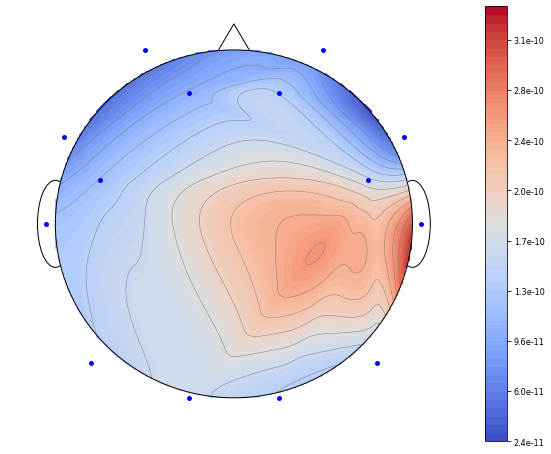

In [115]:
fig, ax = plt.subplots(figsize=(10,8))
plot_topomap(pwrs, ax, fig)
plt.show()
#fig.savefig("topograph.png", bbox_inches='tight')

-----------------------

## Plotting at periods of the data

(19, 30720)
(30720,)


/Users/mpin/opt/miniconda3/lib/python3.8/site-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


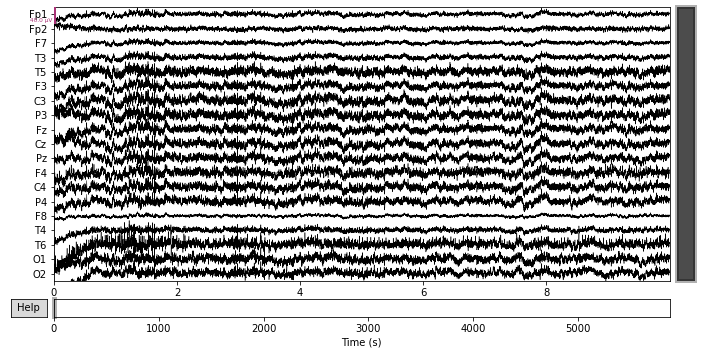

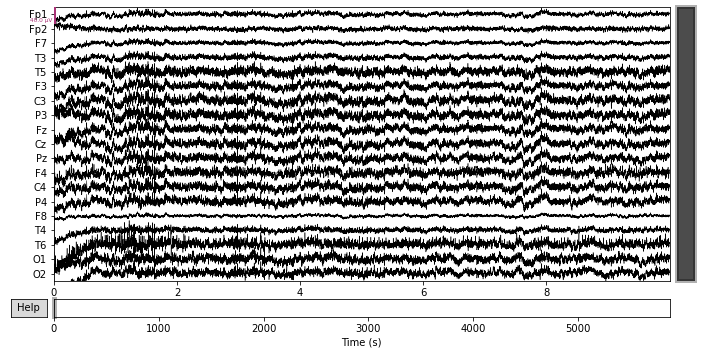

In [87]:
start, stop = raw.time_as_index([100, 115])  # 100 s to 115 s data segment
data, times = raw[:, start:stop]
print(data.shape)
print(times.shape)
data, times = raw[2:20:3, start:stop]  # access underlying data
raw.plot()

------------------------

## Creating events, epochs, and evoked data from mat file

In [19]:
mat = scipy.io.loadmat("../data/1122/impact locations.mat")
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Mar 23 18:04:27 2021',
 '__version__': '1.0',
 '__globals__': [],
 'baselocs': array([[   24113, 11397293]], dtype=int32),
 'elecmax1': array([[ 1872728,  2226507,  2474660,  2735121,  2977559,  3386348,
          3941813,  4246698,  4488521,  4732498,  4994063,  5446315,
          5696726,  5943973,  6187127,  6455898,  7173445,  7383999,
          7630631,  7871373,  8101104,  8343280,  8580663,  8827988,
          9066266,  9314535,  9578138,  9901110, 10135164, 10384935,
         10633197, 10877445, 11132092]], dtype=int32)}

In [55]:
stim_mock = mat['elecmax1']

events = ([[stim_mock[0][0], 0, 1]])
for i in range(len(stim_mock[0])-1):
    events.append([stim_mock[0][i+1], 0, 1])

events = np.array(events)

print(events.shape)
events

(33, 3)


array([[ 1872728,        0,        1],
       [ 2226507,        0,        1],
       [ 2474660,        0,        1],
       [ 2735121,        0,        1],
       [ 2977559,        0,        1],
       [ 3386348,        0,        1],
       [ 3941813,        0,        1],
       [ 4246698,        0,        1],
       [ 4488521,        0,        1],
       [ 4732498,        0,        1],
       [ 4994063,        0,        1],
       [ 5446315,        0,        1],
       [ 5696726,        0,        1],
       [ 5943973,        0,        1],
       [ 6187127,        0,        1],
       [ 6455898,        0,        1],
       [ 7173445,        0,        1],
       [ 7383999,        0,        1],
       [ 7630631,        0,        1],
       [ 7871373,        0,        1],
       [ 8101104,        0,        1],
       [ 8343280,        0,        1],
       [ 8580663,        0,        1],
       [ 8827988,        0,        1],
       [ 9066266,        0,        1],
       [ 9314535,        

In [57]:
epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7) #tmin/tmax likely have to be adjusted
epochs

Not setting metadata
Not setting metadata
33 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


Number of events,33
Events,1: 33
Time range,-0.300 – 0.700 sec
Baseline,-0.300 – 0.000 sec


In [60]:
event_dict = {'header': 1}

epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7, event_id=event_dict,
                    preload=True)

print(epochs.event_id)

Not setting metadata
Not setting metadata
33 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 33 events and 2049 original time points ...
0 bad epochs dropped
{'header': 1}


In [63]:
evoked = epochs['header'].average()
evoked

<Evoked | 'header' (average, N=33), -0.2998 – 0.7002 sec, baseline -0.299805 – 0 sec, 19 ch, ~334 kB>

-----------------

## Visualizing epochs

/Users/mpin/opt/miniconda3/lib/python3.8/site-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


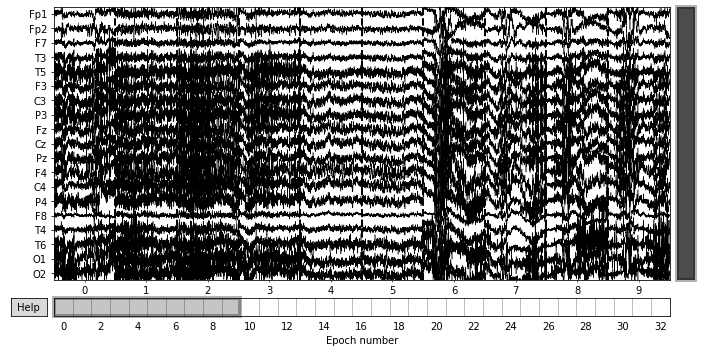

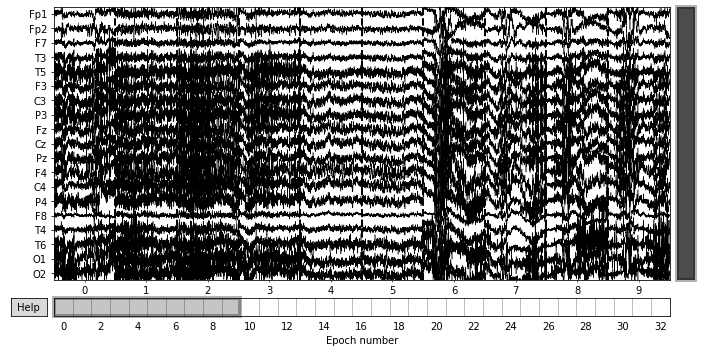

In [61]:
epochs.plot(n_epochs=10)

-----------

## topomaps with MNE

Text(0.5, 1.0, 'MNE')

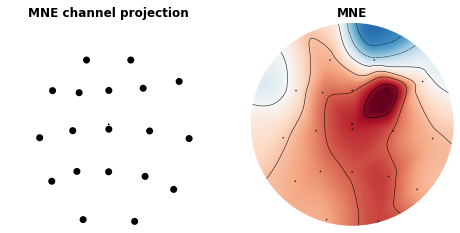

In [108]:
# create a two-panel figure with some space for the titles at the top
fig, ax = plt.subplots(ncols=2, figsize=(8, 4), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)

# we plot the channel positions with default sphere - the mne way
evoked.plot_sensors(axes=ax[0], show=False)

mne.viz.plot_topomap(evoked.data[:, 0], evoked.info, axes=ax[1],
                     show=False)

# add titles
ax[0].set_title('MNE channel projection', fontweight='bold')

ax[1].set_title('MNE', fontweight='bold')

-------

## topomaps of evoked data at specific time stamps with MNE

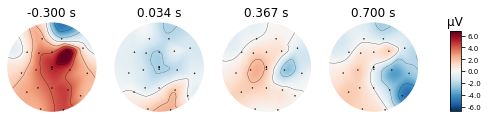

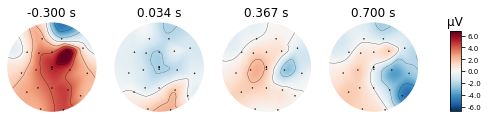

In [74]:
times = np.arange(0.05, 0.151, 0.02)
evoked.plot_topomap(ch_type='eeg', time_unit='s')

Initializing animation...


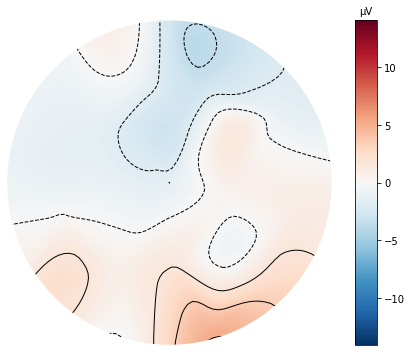

In [116]:
times = np.arange(0.05, 0.151, 0.01)
fig, anim = evoked.animate_topomap(
    times=times, ch_type='eeg', frame_rate=2, time_unit='s', blit=False)

In [119]:
from IPython.display import HTML
HTML(anim.to_html5_video())

Initializing animation...


----------------------